In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [2]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [3]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'LanguageDesireNextYear', 'ConvertedComp']]
df = df.rename({'ConvertedComp': 'Salary'}, axis=1)

df.head(10)

,Country,EdLevel,YearsCodePro,Employment,LanguageDesireNextYear,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",C#;HTML/CSS;JavaScript,NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,Python;Swift,NaN
2,Russian Federation,NaN,NaN,NaN,Objective-C;Python;Swift,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,Java;Ruby;Scala,NaN
5,Germany,"Secondary school (e.g. American high school, G...",4,Employed full-time,HTML/CSS;Java;JavaScript,NaN
6,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,C#;HTML/CSS;PHP,NaN
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,JavaScript,116000.0
8,Tunisia,"Professional degree (JD, MD, etc.)",4,"Independent contractor, freelancer, or self-em...",Python;Rust,NaN
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,HTML/CSS;Java;JavaScript;Python;R;SQL,32315.0


In [4]:
df = df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,LanguageDesireNextYear,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,JavaScript,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,HTML/CSS;Java;JavaScript;Python;R;SQL,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,Go;JavaScript;Swift;TypeScript,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,HTML/CSS;JavaScript,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,Python,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 34756 non-null  object 
 1   EdLevel                 34188 non-null  object 
 2   YearsCodePro            34621 non-null  object 
 3   Employment              34717 non-null  object 
 4   LanguageDesireNextYear  31834 non-null  object 
 5   Salary                  34756 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country                   0
EdLevel                   0
YearsCodePro              0
Employment                0
LanguageDesireNextYear    0
Salary                    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31193 entries, 7 to 64142
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 31193 non-null  object 
 1   EdLevel                 31193 non-null  object 
 2   YearsCodePro            31193 non-null  object 
 3   Employment              31193 non-null  object 
 4   LanguageDesireNextYear  31193 non-null  object 
 5   Salary                  31193 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


In [8]:
df = df[df['Employment'] == 'Employed full-time']
df = df.drop('Employment', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27547 entries, 7 to 64121
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 27547 non-null  object 
 1   EdLevel                 27547 non-null  object 
 2   YearsCodePro            27547 non-null  object 
 3   LanguageDesireNextYear  27547 non-null  object 
 4   Salary                  27547 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


In [9]:
df['Country'].value_counts()

United States                       6927
India                               2172
United Kingdom                      2091
Germany                             1768
Canada                              1077
                                    ... 
Bahamas                                1
Benin                                  1
Democratic Republic of the Congo       1
Namibia                                1
Andorra                                1
Name: Country, Length: 152, dtype: int64

In [10]:
def shorten_categories(country_wise_count, cutoff):
    categorical_map = {}
    for i in range(len(country_wise_count)):
        if country_wise_count.values[i] >= cutoff:
            categorical_map[country_wise_count.index[i]] = country_wise_count.index[i]
        else:
            categorical_map[country_wise_count.index[i]] = 'Other'
    return categorical_map

In [11]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)

In [12]:
df.Country.value_counts()

Other                 7845
United States         6927
India                 2172
United Kingdom        2091
Germany               1768
Canada                1077
Brazil                 915
France                 910
Spain                  616
Netherlands            608
Australia              599
Italy                  535
Poland                 523
Russian Federation     492
Sweden                 469
Name: Country, dtype: int64

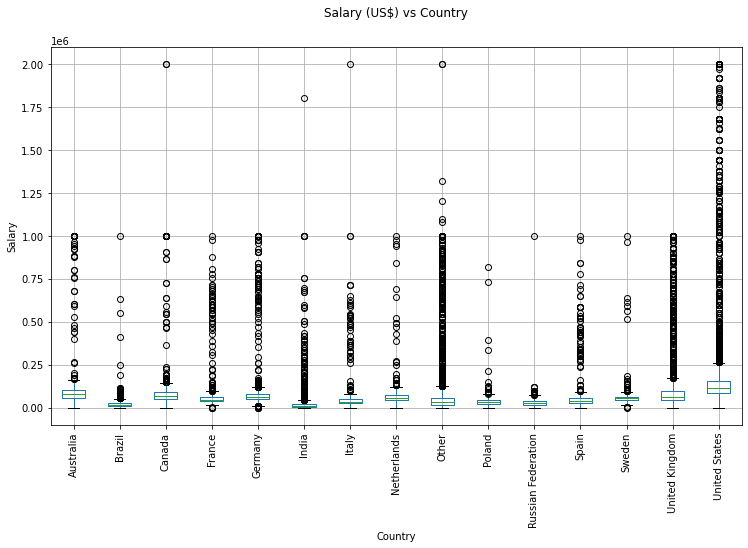

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df = df[df['Salary'] <= 250000]

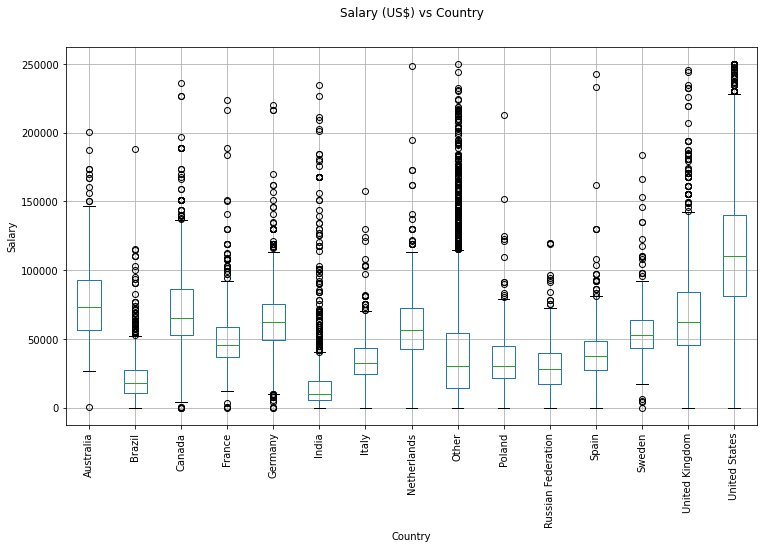

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax = ax)
plt.suptitle('Salary (US$) vs Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [19]:
df['YearsCodePro'].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '14', '12', '29', '6',
       '28', '8', '23', '15', '25', 'Less than 1 year', '5', '9', '11',
       '21', '16', '18', '32', '19', '22', '38', '30', '26', '17', '27',
       '24', '34', '33', '36', '40', '35', '39', '37', '41', '31', '45',
       'More than 50 years', '42', '44', '43', '50', '49', '47'],
      dtype=object)

In [21]:
def clean_experience(x):
    if x == 'More than 50 years':
        return float(50)
    elif x == 'Less than 1 year':
        return float(0.5)
    else:
        return float(x)
df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)
df['YearsCodePro'].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 14. , 12. , 29. ,
        6. , 28. ,  8. , 23. , 15. , 25. ,  0.5,  5. ,  9. , 11. , 21. ,
       16. , 18. , 32. , 19. , 22. , 38. , 30. , 26. , 17. , 27. , 24. ,
       34. , 33. , 36. , 40. , 35. , 39. , 37. , 41. , 31. , 45. , 50. ,
       42. , 44. , 43. , 49. , 47. ])

In [22]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [24]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' or 'Other doctoral degree':
        return 'Post grad'
    return 'Less than a Bachelors'
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [25]:
df['EdLevel'].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Post grad'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder
lbl_enc_education = LabelEncoder()
df['EdLevel'] = lbl_enc_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([0, 1, 2])

In [27]:
lbl_enc_country = LabelEncoder()
df['Country'] = lbl_enc_country.fit_transform(df['Country'])
df.Country.unique()

array([14, 13, 11,  7,  4,  2,  8,  6,  1,  3,  9,  5, 12,  0, 10])

In [28]:
arr = list(df['LanguageDesireNextYear'])
lst = [x.split(';')[0] for x in arr]
df['LanguageDesireNextYear'] = lst
df['LanguageDesireNextYear'].unique()

array(['JavaScript', 'HTML/CSS', 'Go', 'Python', 'C#',
       'Bash/Shell/PowerShell', 'C++', 'C', 'Dart', 'Java', 'Rust',
       'Assembly', 'R', 'Haskell', 'Julia', 'TypeScript', 'Kotlin',
       'Swift', 'PHP', 'Scala', 'SQL', 'Objective-C', 'VBA', 'Ruby',
       'Perl'], dtype=object)

In [29]:
lbl_enc_language = LabelEncoder()
df['LanguageDesireNextYear'] = lbl_enc_language.fit_transform(df['LanguageDesireNextYear'])
df['LanguageDesireNextYear'].unique()

array([10,  7,  6, 16,  3,  1,  4,  2,  5,  9, 19,  0, 17,  8, 11, 23, 12,
       22, 14, 21, 20, 13, 24, 18, 15])

In [30]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [31]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [32]:
y_pred = linear_reg.predict(X)

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y, y_pred))

In [34]:
error

38599.88813236873

In [35]:
from sklearn.tree import DecisionTreeRegressor
desc_tree_reg = DecisionTreeRegressor(random_state=0)
desc_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred = desc_tree_reg.predict(X)

In [37]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(f"${error:.2f}")

$24796.11


In [38]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=1)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=1)

In [39]:
y_pred = random_forest_reg.predict(X)

In [40]:
error = np.sqrt(mean_squared_error(y, y_pred))
print(f"${error:.2f}")

$25354.08


In [41]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {'max_depth': max_depth}
regressor = RandomForestRegressor(random_state=1, verbose=1, n_jobs=10)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    2.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  40 tasks      | elapsed:    0.1s
[Parallel(n

GridSearchCV(estimator=RandomForestRegressor(n_jobs=10, random_state=1,
                                             verbose=1),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [42]:
regressor = gs.best_estimator_
regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print(f"${error:.2f}")

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s


$29419.72


[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


In [43]:
X

,Country,EdLevel,YearsCodePro,LanguageDesireNextYear
7,14,0,13.0,10
9,13,1,4.0,7
10,13,0,2.0,6
11,11,2,7.0,7
12,7,2,20.0,16
...,...,...,...,...
64048,5,0,3.0,10
64053,5,0,18.0,19
64058,2,0,7.0,16
64100,0,0,4.0,1


In [44]:
X = np.array([['India', "Bachelor’s degree", 3, 'Swift']])
X

array([['India', 'Bachelor’s degree', '3', 'Swift']], dtype='<U17')

In [45]:
X[:, 0] = lbl_enc_country.transform(X[:, 0])
X[:, 1] = lbl_enc_education.transform(X[:, 1])
X[:, 3] = lbl_enc_language.transform(X[:, 3])
X = X.astype(float)
X

array([[ 5.,  0.,  3., 22.]])

In [46]:
y_pred = regressor.predict(X)
y_pred

C:\Users\MODERN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


array([15226.64417627])

In [47]:
import pickle

In [48]:
data = {"model": regressor, "lbl_enc_country": lbl_enc_country, "lbl_enc_education": lbl_enc_education, "lbl_enc_language": lbl_enc_language}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [49]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)
regressor_loaded = data['model']
lbl_enc_country = data['lbl_enc_country']
lbl_enc_education = data['lbl_enc_education']
lbl_enc_language = data['lbl_enc_language']

In [50]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\MODERN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:    0.0s
[Parallel(n_jobs=10)]: Done 100 out of 100 | elapsed:    0.0s finished


array([15226.64417627])